## Quantum Phase Estimation (QPS)

![image.png](https://raw.githubusercontent.com/Qiskit/textbook/aebdd2bc86ddb7a79dd8441d52c839d312ffafbb/notebooks/ch-algorithms/images/qpe_tex_qz.png)

- Akwgnolegement

    This module's circuit was extracted from a [Qiskit Repositorie.](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-phase-estimation.ipynb)


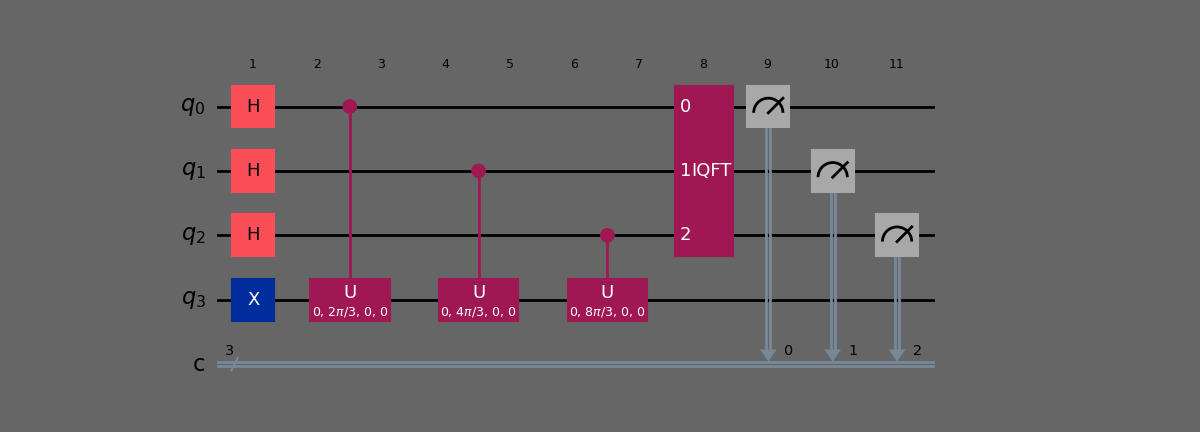

In [31]:

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
from qiskit.circuit.library import QFT

qpe = QuantumCircuit(4, 3)

# H-Gates to control qubits:
for qubit in range(3):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(3)

# Controlled-U angles (theta) for qubits in descending order:
angle = 2*math.pi/3

for control_qubit in range(3):
    qpe.cu(0, angle, 0, 0, control_qubit, 3);
    angle *= 2

qpe.append(QFT(3, inverse=True), range(3))

for n in range(3):
    qpe.measure(n,n)

style = {
    'backgroundcolor': '#666666', # color of the background
    'textcolor': '#000000', # color of all text (e.g. gate names, etc.)
    'gatetextcolor': '#FFFFFF', # color of the text on the gates
    'subfontsize': 9, # font size of subscripts
    'fontsize': 13, # font size of the normal text
    'linewidth': 1.0, # width of the lines
    'barrierfacecolor': 'white', # facecolor of the barrier box
    'showindex': True, # show the index of the qubits (0, 1, 2, 3, ...)
    'margin': [4.0, 4.0, 0.4, 1.0] # margin (right, left, bottom, top)
}

qpe.draw(style=style, output="mpl")

SamplerResult(quasi_dists=[{0: 0.021, 1: 0.03, 2: 0.192, 3: 0.675, 4: 0.044, 5: 0.012, 6: 0.016, 7: 0.01}], metadata=[{'shots': 1000}])
{0: 0.021, 1: 0.03, 2: 0.192, 3: 0.675, 4: 0.044, 5: 0.012, 6: 0.016, 7: 0.01}


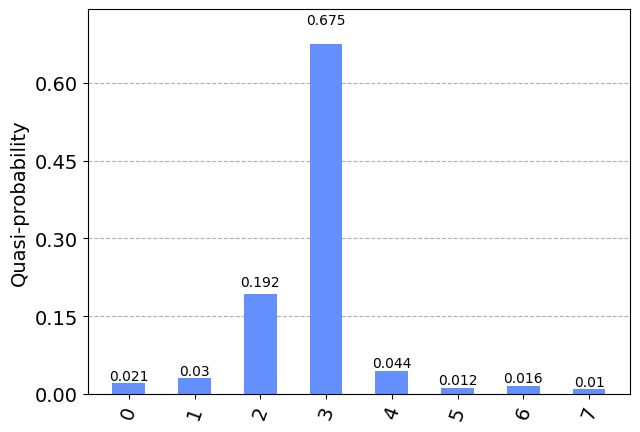

In [33]:
# Run a simulation with Sampler
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

sampler = Sampler()
job = sampler.run(qpe, shots=1000)

# Get the result
result = job.result()
print(result)
values = result.quasi_dists[0]
print(values)


# Plot the results
plot_histogram(values)